<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;"><font size=4 color=blue><b>[7차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
○ HSV 색상공간을 이해하고 원하는 색상을 추출하는 방법을 학습한다.<br><br>
○ 크로마 키(Chroma key) 합성으로 이미지를 합성하는 방법을 학습한다.<br><br> 
○ 이미지 필터링 방법에 대해 학습한다.<br><br>
○ 모폴로지 연산 방법에 대해 학습한다.      
        </font></td></tr>   
</table>

# 색상공간 (Color Space) 이해하기

- RGB : Red, Green, Blue로 구성된 색상공간 - PC의 모니터에 주로 사용
  - 가산혼합 : 색을 섞을수록 명도가 높아지는 혼합
<img src="./lecture_image/07_color_space2.png" width=40%>


- CMYK : Cyan, Magenta, Yellow, Black으로 구성된 색상공간 - 인쇄용으로 주로 사용
  - 감산혼합 : 색을 섞을수록 명도가 낮아지는 혼합
<img src="./lecture_image/07_color_space3.png" width=40%>  


- HSV : Hue(색상), Saturation(채도), Value(명도)로 변환한 색상공간 
  - 직관적으로 색상 파악이 용이

<img src="./lecture_image/07_color_space.png" width=50%>

- YUV : Y (밝기, 휘도), U, V (색상)을 이용해서 색상을 표현하는 색상공간
  - U축 : 파란색에서 밝기 성분을 뺀 값 (U = B - Y)
  - V축 : 빨간색에서 밝기 성분을 뺀 값 (V = R - Y)
  - 아날로그 컬러신호 변환에 주로 사용
  - TV나 비디오카메라에 주로 사용
  
  
- YCbCr : Y (밝기, 휘도), Cb (청색 크로마 성분), Cr (적색 크로마 성분)을 이용해서 색상을 표현하는 색상공간
   - YUV와 유사한 형태로 RGB 색공간과는 다르게 별도의 명암을 구분하는 U(Cb), V(Cr) 사용
   - 디지털 텔레비전, 비디오, 디지털 사진에서 사용하는 색공간
   
<img src="./lecture_image/07_color_space4.png" width=20%>   


- CIE : 인간의 색채 인지에 대한 연구와 측정을 바탕으로 수학적으로 정의된 색상 공간
  - XYZ : 적색(X), 녹색(Y), 청색(Z) 계열의 반응정도값을 적용 
  - Lab : 색오차와 근소한 색차이를 표현하기 위해 변환된 색상 공간
  - Luv : 지각적 분균등성을 해소한 균등 색상 공간 (3차원 직교좌표를 이용하는 색상 공간)
  
<img src="./lecture_image/07_color_space5.png" width=30%>    

- HSV 색상공간의 구성
 
 <img src="./lecture_image/07_hsv.png" width=70%>


- 색상 값 
  - Hue 값은 0-179 범위로 설정
  - 만약 Hue 값을 -로 설정하면 뒤쪽부터 인덱싱됨

<img src="./lecture_image/07_hsv2.png" width=50%>

<table style="border-collapse: collapse; width: 100%; height: 140px;" border="1" data-ke-align="alignLeft" data-ke-style="style12">
<tbody>
<tr style="height: 20px;">
<td style="width: 13.6047%; text-align: center; height: 20px;"><b>명칭</b></td>
<td style="width: 11.5115%; text-align: center; height: 20px;"><b>값의 범위</b></td>
<td style="width: 49.8837%; text-align: center; height: 20px;"><b>참고</b></td>
</tr>
<tr style="height: 40px;">
<td style="width: 13.6047%; height: 40px; text-align: center;"><b>색상(H)</b></td>
<td style="width: 11.5115%; height: 40px; text-align: center;">0 ~ 180</td>
<td style="width: 49.8837%; height: 40px;">원래 0~360범위이지만 OpenCV에서는 1/2 범위이다</td>
</tr>
<tr style="height: 40px;">
<td style="width: 13.6047%; height: 40px; text-align: center;"><b>채도(S)</b></td>
<td style="width: 11.5115%; height: 40px; text-align: center;">0 ~ 255</td>
<td style="width: 49.8837%; height: 40px;">값이 0에 가까우면 하얀색, 255에 가까울수록 H의 색상이 된다.</td>
</tr>
<tr style="height: 40px;">
<td style="width: 13.6047%; height: 40px; text-align: center;"><b>명도(V)</b></td>
<td style="width: 11.5115%; height: 40px; text-align: center;">0 ~ 255</td>
<td style="width: 49.8837%; height: 40px;">값이 0에 가까우면 검은색, 255에 가까울수록 &nbsp;H의 색상이 된다.</td>
</tr>
</tbody>

## 색상추적

(-0.5, 260.5, 192.5, -0.5)

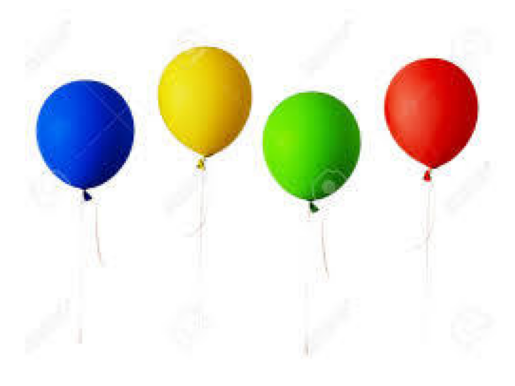

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images/balloon.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')

Text(0.5, 1.0, 'blue')

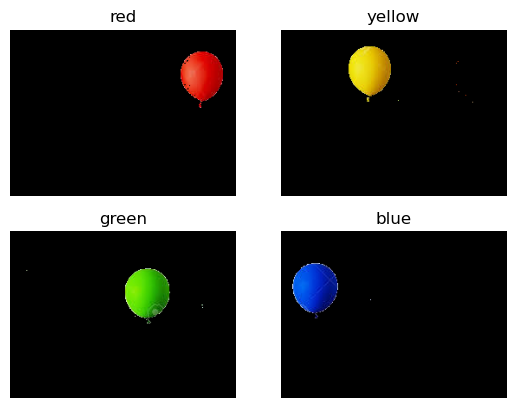

In [2]:
# RGB에서 HSV로 변환
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# HSV 색상공간에서 추적한 색상의 범위를 설정
# (hsv, 최솟값, 최댓값)
mask_red_1 = cv2.inRange(hsv, (170, 100, 100), (180, 255, 255))
mask_red_2 = cv2.inRange(hsv, (0, 100, 100), (6, 255, 255))
img_red_1 = cv2.bitwise_and(img, img, mask=mask_red_1)
img_red_2 = cv2.bitwise_and(img, img, mask=mask_red_2)
img_red = cv2.bitwise_or(img_red_1, img_red_2)

mask_yellow = cv2.inRange(hsv, (8, 100, 100), (40, 255, 255))
img_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)

mask_green = cv2.inRange(hsv, (40, 40, 50), (90, 255, 255))
img_green = cv2.bitwise_and(img, img, mask=mask_green)

mask_blue = cv2.inRange(hsv, (90, 35, 0), (125, 255, 255))
img_blue = cv2.bitwise_and(img, img, mask=mask_blue)

plt.subplot(2, 2, 1)
plt.imshow(img_red)
plt.axis('off')
plt.title('red')

plt.subplot(2, 2, 2)
plt.imshow(img_yellow)
plt.axis('off')
plt.title('yellow')

plt.subplot(2, 2, 3)
plt.imshow(img_green)
plt.axis('off')
plt.title('green')

plt.subplot(2, 2, 4)
plt.imshow(img_blue)
plt.axis('off')
plt.title('blue')

(-0.5, 1919.5, 639.5, -0.5)

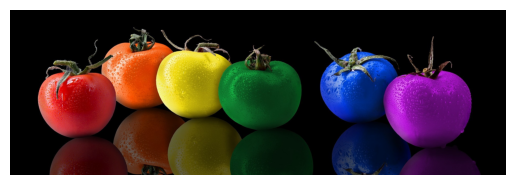

In [4]:
# tomato.jpg
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images/tomato.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')

Text(0.5, 1.0, 'red')

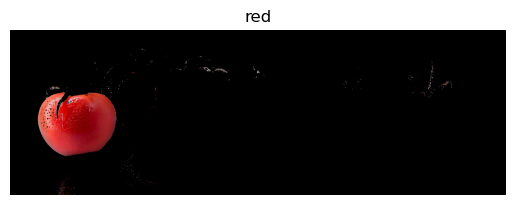

In [19]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

mask_red_1 = cv2.inRange(hsv, (170, 0, 100), (180, 255, 255))
mask_red_2 = cv2.inRange(hsv, (0, 0, 100), (7, 255, 255))
img_red_1 = cv2.bitwise_and(img, img, mask=mask_red_1)
img_red_2 = cv2.bitwise_and(img, img, mask=mask_red_2)
img_red = cv2.bitwise_or(img_red_1, img_red_2)

plt.imshow(img_red)
plt.axis('off')
plt.title('red')

Text(0.5, 1.0, 'orange')

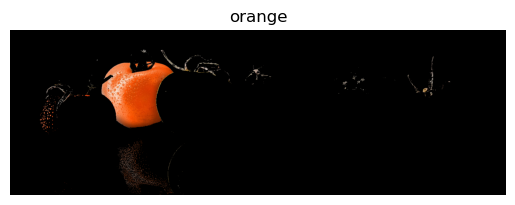

In [61]:
mask_orange = cv2.inRange(hsv, (7, 0, 100), (23, 255, 255))
img_orange= cv2.bitwise_and(img, img, mask=mask_orange)

plt.imshow(img_orange)
plt.axis('off')
plt.title('orange')

Text(0.5, 1.0, 'yellow')

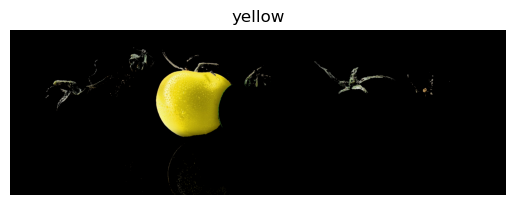

In [62]:
mask_yellow = cv2.inRange(hsv, (15, 0, 100), (60, 255, 255))
img_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)

plt.imshow(img_yellow)
plt.axis('off')
plt.title('yellow')

In [ ]:
# candies.png

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다음과 같이 이미지에서 원하는 색상을 추출해보자.</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./lecture_image/07_extract_color.png" width=60%></td></tr>   
</table>

## 크로마 키(Chroma key) 합성 

- 녹색 또는 파란색 배경에서 찰영한 영상에 다른 배경 영상을 합성하는 기술

In [ ]:
#실습

In [ ]:
#실습

In [ ]:
#실습

# 이미지 연산


## 이미지 필터링 - blur

- <font color=red>cv2.filter2D(img, -1, kernel)</font>
  - 이미지와 필터를 컨볼루션 연산 수행
  - 2번째 파라미터는 색의 깊이 (몇 비트)로 -1이면 원본 이미지와 동일
  - kernel : 적용할 2차원 필터
  
 <img src="./lecture_image/07_filter2d.png" width=60%></td></tr>    

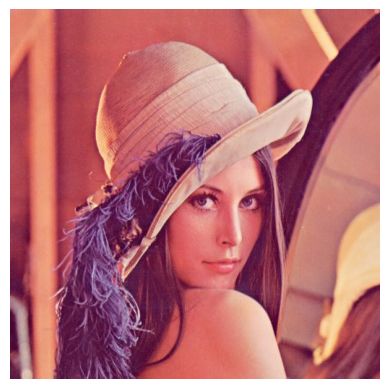

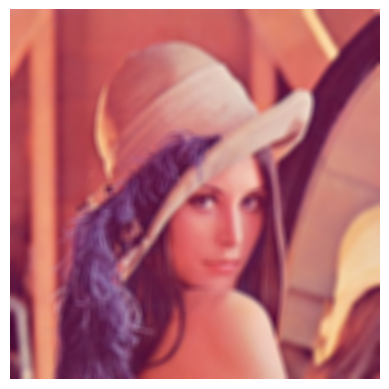

In [181]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('images/lenna.png', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# (5, 5) 크기의 필터에 1로 초기화하고 25로 나눈다
kernel = np.ones((10,10), np.float32) / 100

# 컴볼루션으로 필터링
blur = cv2.filter2D(img, -1, kernel)

plt.imshow(img)
plt.axis('off')
plt.show()

plt.imshow(blur)
plt.axis('off')
plt.show()

## 모폴로지 - 침식과 팽창 

- Morphology : 영상의 형태학적 측면을 다루는 기법으로 전처리 등에 사용


- Erosion (침식) : 이미지의 경계부분을 배경 픽셀로 변경하는 작업 (1이 0으로 변경)
- Dilation (팽창) : 이미지의 배경부분을 전경 픽셀로 변경하는 작업 (0이 1로 변경)
  - iterations = 1 : 반복 적용 회수 (회수가 많아지면 침식과 팽창의 효과가 커짐)
  
 <img src="./lecture_image/07_mophology.png" width=60%></td></tr>    

Text(0.5, 1.0, 'dilate')

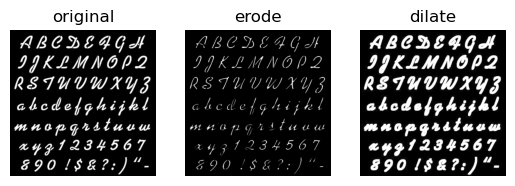

In [189]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('images/number.png', cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('original')


kernel = np.ones((3,3), np.uint8) # 필터는 홀수로 한다. 왜?

# 침식연산
result_e = cv2.erode(img, kernel, iterations=1)
plt.subplot(1, 3, 2)
plt.imshow(result_e, cmap='gray')
plt.axis('off')
plt.title('erode')


# 팽창연산
result_d = cv2.dilate(img, kernel, iterations=1)
plt.subplot(1, 3, 3)
plt.imshow(result_d, cmap='gray')
plt.axis('off')
plt.title('dilate')

Text(0.5, 1.0, 'dilate')

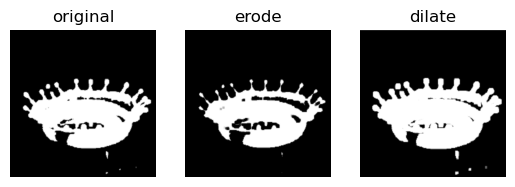

In [193]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('images/water_drop.png', cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('original')


kernel = np.ones((5,5), np.uint8) # 필터는 홀수로 한다. 왜?

# 침식연산
result_e = cv2.erode(img, kernel, iterations=1)
plt.subplot(1, 3, 2)
plt.imshow(result_e, cmap='gray')
plt.axis('off')
plt.title('erode')


# 팽창연산
result_d = cv2.dilate(img, kernel, iterations=1)
plt.subplot(1, 3, 3)
plt.imshow(result_d, cmap='gray')
plt.axis('off')
plt.title('dilate')

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다음과 같이 열림과 팽창 연산을 수행해보자.</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./lecture_image/07_mophology1.png" width=60%></td></tr>   
</table>

## Opening과 Closing

- Opening : erosion 수행 후에 바로 dilate을 수행하여 원래 이미지 크기로 돌려 놓는 것

<img src="./lecture_image/07_mophology3.png" width=40%>


- Closing : dilate 수행 후에 바로 erosion을 수행하여 원래 이미지 크기로 돌려 놓는 것

<img src="./lecture_image/07_mophology4.png" width=40%>  

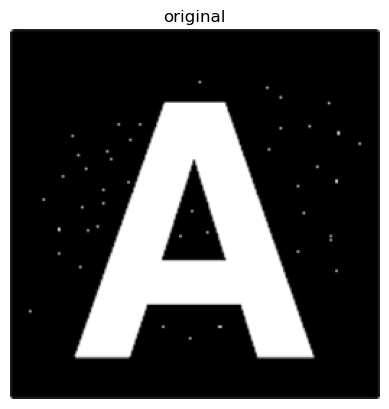

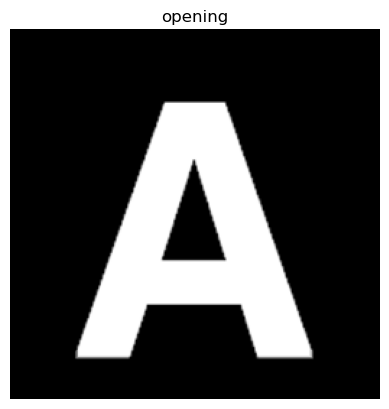

In [200]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('images/noise_A.png', cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('original')
plt.show()

kernel = np.ones((5,5), np.uint8)

# opening 연산 : 검정색 부분에 있는 흰색 잡음을 제거

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=1)
plt.imshow(opening, cmap='gray')
plt.axis('off')
plt.title('opening')
plt.show()

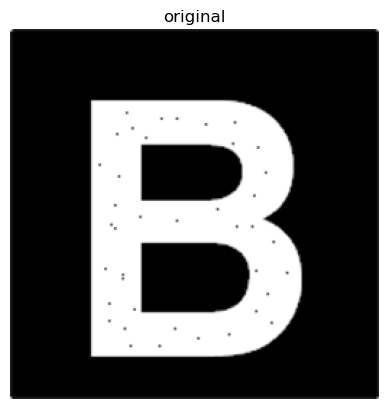

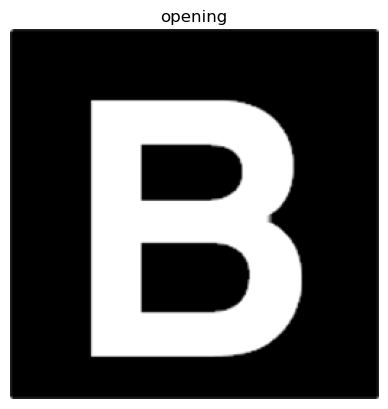

In [201]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('images/noise_B.png', cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('original')
plt.show()

kernel = np.ones((5,5), np.uint8)

# opening 연산 : 검정색 부분에 있는 흰색 잡음을 제거

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray')
plt.axis('off')
plt.title('closing')
plt.show()

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; text-align: left;"><font size=4 color=red><b>실습문제</b></font><br><br>
        <font size=4>○ 다음과 같이 모폴로지 연산을 이용하여 이미지를 필터링 해보자.</font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;">
        <img src="./lecture_image/07_mophology5.png" width=80%></td></tr>   
</table>

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[7차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=2>

○ 색상공간의 종류 : RGB, CYMK, HSV, YUV, YCbCr, CIE 등
        
○ HSV 색공간  : H(색상), S(채도), V(명도)
        
        
○ 크로마 키 합성 : 녹색 또는 파란색 배경에서 찰영한 영상에 다른 배경 영상을 합성하는 기술<br>

○ copyTo() : 녹색 영역에 다른 영역 배경을 합성하기   
        

○ <font color=red>cv2.filter2D(img, -1, kernel)</font> : 이미지와 필터를 컨볼루션 연산 수행

○ 모폴로지 연산 : 영상의 형태학적 측면을 다루는 기법으로 전처리 등에 사용
        
- Erosion (침식) : 이미지의 경계부분을 배경 픽셀로 변경하는 작업 (1이 0으로 변경)        
- Dilation (팽창) : 이미지의 배경부분을 전경 픽셀로 변경하는 작업 (0이 1로 변경)        
- Opening : erosion 수행 후에 바로 dilate을 수행하여 원래 이미지 크기로 돌려 놓는 것        
- Closing : dilate 수행 후에 바로 erosion을 수행하여 원래 이미지 크기로 돌려 놓는 것          
       
</font></td></tr>   
</table>
